JUPYTER NOTEBOOK CREATED BY

# DR. RAJAN GUPTA
# DEEN DAYAL UPADHYAYA COLLEGE
# UNIVERSITY OF DELHI
# rgupta.cs.du@gmail.com

In [ ]:
#This will contain the content of Unit 4 from Chapter 5 and 10

UNIT IV - Data Exploration - 1. Exploring data using statistical methods: mean,
median, mode1, quantiles. Building contingency table 2. Basics of grouping data and Correlation. [5.3, 10.1 (upto page 293)]

In [ ]:
#Import the libraries
import pandas as pd
import numpy as np

**Summarizing and Computing Descritive Statistics**

In [ ]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [ ]:
#finding the sum of the columns
df.sum()

one    9.25
two   -5.80
dtype: float64

In [ ]:
#finding sum row wise
df.sum(axis='columns')

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [ ]:
#finding sum row wise
df.sum(axis=1)

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [ ]:
#Finding mean of the data
df.mean()

one    3.083333
two   -2.900000
dtype: float64

In [ ]:
#Finding means with considering NaN observation
df.mean(skipna=False)

one   NaN
two   NaN
dtype: float64

In [ ]:
#Finding means of every row
df.mean(axis=1)

a    1.400
b    1.300
c      NaN
d   -0.275
dtype: float64

In [ ]:
#Finding index value of the minimum or maximum values
df.idxmax()

one    b
two    d
dtype: object

In [ ]:
df.idxmin()

one    d
two    b
dtype: object

In [ ]:
#Finding the cumulative sum
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


In [ ]:
#Descriptive summary statistics
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


In [ ]:
#Summary statistics on non-numeric data iwll produce count
obj = pd.Series(['a', 'a', 'b', 'c'] * 4)
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

Major Statistical methods - count, describe, min, max, idxmin, idxmax, quantile, sum, mean, median, mad, prod, var, std, skew, kurt, cumsum, cummin, cummax, cumprod, diff, pct_change

**Correlation and Covariance**


Consider some DataFrames of stock prices and volumes obtained
from Yahoo! Finance using the add-on pandas-datareader package

In [ ]:
#Data scrapping from web
#conda install pandas-datareader  - on local machines we may run this
import pandas_datareader.data as web

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [ ]:
all_data = {ticker: web.get_data_yahoo(ticker) 
            for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']}

In [ ]:
all_data

{'AAPL':                   High         Low  ...       Volume   Adj Close
 Date                                ...                         
 2015-10-01   27.405001   26.827499  ...  255716400.0   25.316107
 2015-10-02   27.752501   26.887501  ...  232079200.0   25.500929
 2015-10-05   27.842501   27.267500  ...  208258800.0   25.593342
 2015-10-06   27.934999   27.442499  ...  192787200.0   25.715784
 2015-10-07   27.942499   27.352501  ...  187062400.0   25.593342
 ...                ...         ...  ...          ...         ...
 2020-09-22  112.860001  109.160004  ...  183055400.0  111.809998
 2020-09-23  112.110001  106.769997  ...  150718700.0  107.120003
 2020-09-24  110.250000  105.000000  ...  167743300.0  108.220001
 2020-09-25  112.440002  107.669998  ...  149981400.0  112.279999
 2020-09-28  115.320000  112.779999  ...  137242800.0  114.959999
 
 [1257 rows x 6 columns],
 'GOOG':                    High          Low  ...   Volume    Adj Close
 Date                            

In [ ]:
price = pd.DataFrame({ticker: data['Adj Close']
                      for ticker, data in all_data.items()})

In [ ]:
volume = pd.DataFrame({ticker: data['Volume']
                       for ticker, data in all_data.items()})

In [ ]:
#compute percent changes of the prices, a time series operation
returns = price.pct_change()
returns.tail()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2020-09-22,0.015716,0.002162,0.024094,0.023967
2020-09-23,-0.041946,-0.013941,-0.032928,-0.034290
2020-09-24,0.010269,-0.006227,0.012962,0.009243
2020-09-25,0.037516,0.007283,0.022787,0.011671
2020-09-28,0.023869,0.023371,0.007795,0.013537


In [ ]:
#corr method of Series computes the correlation of the overlapping, non-NA,
#aligned-by-index values in two Series
returns['MSFT'].corr(returns['IBM'])

0.5745212207496073

In [ ]:
#cov computes the covariance
returns['MSFT'].cov(returns['IBM'])

0.00016150424649777784

In [ ]:
#other way of writing correlation command
returns.MSFT.corr(returns.IBM)

0.5745212207496073

In [ ]:
#finding the correlation of all the variables
returns.corr()

,AAPL,IBM,MSFT,GOOG
AAPL,1.000000,0.496632,0.706306,0.655421
IBM,0.496632,1.000000,0.574521,0.535185
MSFT,0.706306,0.574521,1.000000,0.783632
GOOG,0.655421,0.535185,0.783632,1.000000


In [ ]:
#finding the covariance of all the variables
returns.cov()

,AAPL,IBM,MSFT,GOOG
AAPL,0.000351,0.000149,0.000232,0.000203
IBM,0.000149,0.000257,0.000162,0.000142
MSFT,0.000232,0.000162,0.000307,0.000227
GOOG,0.000203,0.000142,0.000227,0.000273


In [ ]:
#compute pairwise correlations
returns.corrwith(returns.IBM)

AAPL    0.496632
IBM     1.000000
MSFT    0.574521
GOOG    0.535185
dtype: float64

In [ ]:
#Passing a DataFrame computes the correlations of matching column names. 
#Here we compute correlations of percent changes with volume
returns.corrwith(volume)

AAPL   -0.078715
IBM    -0.098723
MSFT   -0.054412
GOOG   -0.150547
dtype: float64

In [ ]:
#Passing axis='columns' does things row-by-row instead
returns.corrwith(volume, axis='columns')

Date
2015-10-01         NaN
2015-10-02   -0.504557
2015-10-05   -0.959776
2015-10-06    0.352378
2015-10-07   -0.503653
                ...   
2020-09-22    0.031300
2020-09-23   -0.670499
2020-09-24    0.379663
2020-09-25    0.944027
2020-09-28    0.425317
Length: 1257, dtype: float64

**Unique Values, Value Counts, Memberships**

In [ ]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [ ]:
#Finding unique objects
uniques = obj.unique()
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

In [ ]:
#sorted unique objects can also be displayed
uniques.sort()

In [ ]:
uniques

array(['a', 'b', 'c', 'd'], dtype=object)

In [ ]:
#finding the count of the object occurrences
obj.value_counts()

c    3
a    3
b    2
d    1
dtype: int64

In [ ]:
#sorted indexes with count of their occurrences
pd.value_counts(obj.values, sort=False)

b    2
a    3
c    3
d    1
dtype: int64

In [ ]:
#Membership check operator
mask = obj.isin(['b','c'])
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [ ]:
obj[mask]

0    c
5    b
6    b
7    c
8    c
dtype: object

In [ ]:
#Finding an index array from an array of possibly non-distinct values 
#into another array of distinct values
to_match = pd.Series(['c', 'a', 'b', 'b', 'c', 'a'])
unique_vals = pd.Series(['c', 'b', 'a'])
pd.Index(unique_vals).get_indexer(to_match)

array([0, 2, 1, 1, 0, 2])

In the above, c is present at 0, a is present at 2, b is present at 1, b is present at1, c is present at 0, a is present at 2, and hence the output is 021102. We have matched the input array and found index position of each element in the unique array.

In [ ]:
#Compute a histogram on multiple related columns in a DataFrame and 
#for that some processing is required as shown below
data = pd.DataFrame({'Qu1': [1, 3, 4, 3, 4],
                     'Qu2': [2, 3, 1, 2, 3],
                     'Qu3': [1, 5, 2, 4, 4]})
data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [ ]:
result = data.apply(pd.value_counts).fillna(0)
result

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


In the above, the row labels in the result are the distinct values occurring in all of the columns.
The values are the respective counts of these values in each column.

**GROUPBY MECHANICS (10.1)**

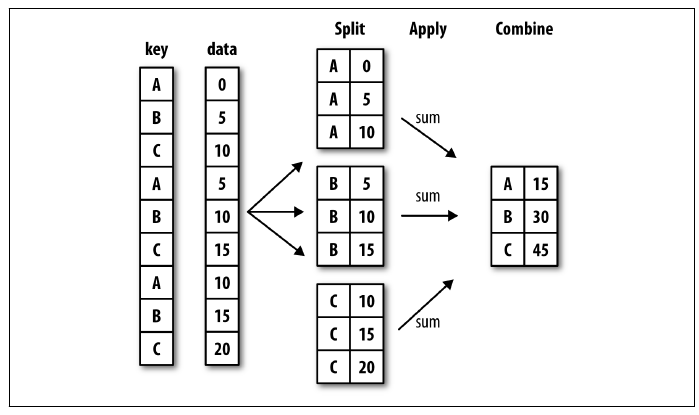

Illustration of a Group Aggregation

Each grouping key can take many forms, and the keys do not have to be all of the same type.


*   A list or array of values that is the same length as the axis being grouped
*   A value indicating a column name in a DataFrame
*   A dict or series giving a correspondence between the values on the asix being grouped and the group means
*   A function to be invoked on the axis index or the individual labels in the index

In [ ]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,1.211800,0.346392
1,a,two,0.176211,-0.281228
2,b,one,-1.389658,1.338088
3,b,two,0.026332,-0.712876
4,a,one,-0.199101,-0.176604


In [ ]:
#grouping data1 for each label in key1
grouped = df['data1'].groupby(df['key1'])
grouped

In [ ]:
#computing mean of data1 for groups from key1
grouped.mean()

key1
a    0.396303
b   -0.681663
Name: data1, dtype: float64

In [ ]:
#finding means of data1 across groups of key1 and key2
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

key1  key2
a     one     0.506349
      two     0.176211
b     one    -1.389658
      two     0.026332
Name: data1, dtype: float64

In [ ]:
#instead of heirarchical keys, we can unstack the data to look like a table
means.unstack()

key2,one,two
key1,,
a,0.506349,0.176211
b,-1.389658,0.026332


In [ ]:
#grouping for key1
df.groupby('key1').mean()

,data1,data2
key1,,
a,0.396303,-0.037147
b,-0.681663,0.312606


In [ ]:
#grouping for key1 and key2
df.groupby(['key1','key2']).mean()

data1     data2
key1 key2                    
a    one   0.506349  0.084894
     two   0.176211 -0.281228
b    one  -1.389658  1.338088
     two   0.026332 -0.712876

In [ ]:
#returns a Series containing group sizes
#any missing values in a group key will be excluded from the result
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

**Iterating over Groups**

In [ ]:
for name, group in df.groupby('key1'):
  print(name)
  print(group)

a
  key1 key2     data1     data2
0    a  one  1.211800  0.346392
1    a  two  0.176211 -0.281228
4    a  one -0.199101 -0.176604
b
  key1 key2     data1     data2
2    b  one -1.389658  1.338088
3    b  two  0.026332 -0.712876


In [ ]:
#we can iterate over dataframe using keys as well
for (k1, k2), group in df.groupby(['key1', 'key2']):
  print((k1, k2))
  print(group)

('a', 'one')
  key1 key2     data1     data2
0    a  one  1.211800  0.346392
4    a  one -0.199101 -0.176604
('a', 'two')
  key1 key2     data1     data2
1    a  two  0.176211 -0.281228
('b', 'one')
  key1 key2     data1     data2
2    b  one -1.389658  1.338088
('b', 'two')
  key1 key2     data1     data2
3    b  two  0.026332 -0.712876


In [ ]:
#computing a dict of the data pieces as a one-liner
pieces = dict(list(df.groupby('key1')))
pieces

{'a':   key1 key2     data1     data2
 0    a  one  1.211800  0.346392
 1    a  two  0.176211 -0.281228
 4    a  one -0.199101 -0.176604, 'b':   key1 key2     data1     data2
 2    b  one -1.389658  1.338088
 3    b  two  0.026332 -0.712876}

In [ ]:
pieces['b']

,key1,key2,data1,data2
2,b,one,-1.389658,1.338088
3,b,two,0.026332,-0.712876


In [ ]:
#checking the datatype of each element of the dataframe
df.dtypes

key1      object
key2      object
data1    float64
data2    float64
dtype: object

In [ ]:
#we can change the axis of groupy to make it row-wise
grouped = df.groupby(df.dtypes, axis=1)
grouped

In [ ]:
for dtype, group in grouped:
  print(dtype)
  print(group)

float64
      data1     data2
0  1.211800  0.346392
1  0.176211 -0.281228
2 -1.389658  1.338088
3  0.026332 -0.712876
4 -0.199101 -0.176604
object
  key1 key2
0    a  one
1    a  two
2    b  one
3    b  two
4    a  one


**Selecting a Column or Subset of Columns**

Indexing a GroupBy object created from a DataFrame with a column name or array
of column names has the effect of column subsetting for aggregation

In [ ]:
df.groupby('key1')['data1']
df.groupby('key1')[['data2']]

In [ ]:
#similar to
df['data1'].groupby(df['key1'])
df[['data2']].groupby(df['key1'])

In [ ]:
#it may be desirable to aggregate only a few columns
df.groupby(['key1', 'key2'])[['data2']].mean()

data2
key1 key2          
a    one   0.084894
     two  -0.281228
b    one   1.338088
     two  -0.712876

In [ ]:
#by storing the groups and then computing the mean
s_grouped = df.groupby(['key1', 'key2'])['data2']
s_grouped.mean()

key1  key2
a     one     0.084894
      two    -0.281228
b     one     1.338088
      two    -0.712876
Name: data2, dtype: float64